# <span style="color:blue">Project title/1: "From Guns to Crimes: Predicting Crime Rates in New York State, USA </span>

## <span style="color:brown">1. Data Collection & Presentation</span>

<div class="alert alert-block alert-info">
    <p>The Division of Criminal Justice Services (DCJS) collects crime reports from more than 500 New York State police and sheriffs’ departments. DCJS compiles these reports as New York’s official crime statistics and submits them to the FBI under the National Uniform Crime Reporting (UCR) Program. UCR uses standard offense definitions to count crime in localities across America regardless of variations in crime laws from state to state. In New York State, law enforcement agencies use the UCR system to report their monthly crime totals to DCJS. The UCR reporting system collects information on seven crimes classified as Index offenses which are most commonly used to gauge overall crime volume. These include the violent crimes of murder/non-negligent manslaughter, forcible rape, robbery, and aggravated assault; and the property crimes of burglary, larceny, and motor vehicle theft. Firearm counts are derived from taking the number of violent crimes which involve a firearm. Population data are provided every year by the FBI, based on US Census information. Police agencies may experience reporting problems that preclude accurate or complete reporting. The counts represent only crimes reported to the police but not total crimes that occurred. DCJS posts preliminary data in the spring and final data in the fall. <br></p>
    <p><b>Dataset Summary</b><br></p>
<p>Organization:	Office of Justice Research and Performance</p>
<p>Time Period:	January 1990 — Present</p>
<p>Posting Frequency:	Annually</p>
<p>Data Frequency:	Annually</p>
<p>Dataset Owner:	Office of Justice Research and Performance</p>
<p>Contact Information:	dcjsstats@dcjs.ny.gov</p>
<p>Coverage	Statewide Police Departments with exceptions</p>
<p>Granularity	County</p>
<p>Units:	Crime Incident or Victim <br></p>
    <p> accessible link: <b><a href="https://data.ny.gov/Public-Safety/Index-Violent-Property-and-Firearm-Rates-By-County/34dd-6g2j">DATA.NY.GOV</a></b><br></p>

    
<p><b>Content</b></p>
    
|Data label|Data Type|Data Description|
|----------|----------|----------------|
|County|Text|Location where crime was reported.|
|Year|Numeric|Year the crime incident was reported.|
|Population|Total Index Count|County population estimates provided by the FBI.|
|Total Index Count|Numeric|Sum of the reported crimes: Murder, Rape, Robbery, Aggravated Assault, Burglary, Larceny and Motor Vehicle Theft|
|Index Rate|Numeric|Index Crimes reported per 100,000 population.|
|Total Violent Count|Numeric|Sum of the reported crimes: Murder, Rape, Robbery and Aggravated Assault.|
|Violent Rate|Numeric|Violent Crimes reported per 100,000 population.|
|Total Property Count|Numeric|Sum of the reported crimes: Burglary, Larceny and Motor Vehicle Theft.|
|Property Rate|Numeric|Property crimes reported per 100,000 population.|
|Firearm Count|Numeric|Count of violent crimes committed with a firearm. |
|Firearm Rate|Numeric|Firearm crimes reported per 100,000 population.| 
    
<p><b>Disclaimers</b></p>
<p>Limitations	Police agencies may experience reporting problems that preclude accurate or complete reporting. The counts represent only crimes reported to the police but not total crimes that occurred.</p>
</div>

## <span style="color:brown">2. Data Wrangling</span>

In [1]:
#let's import the necessary libraries and modules for the project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
%matplotlib inline

In [2]:
# let's import and load the data on jupyter interface
file_name = 'Index__Violent__Property__and_Firearm_Rates_By_County__Beginning_1990.csv'

df = pd.read_csv(file_name)
df

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,1990,292594.0,14418,4927.6,1524,520.9,12894,4406.8,122.0,41.7
1,Albany,1991,294030.0,15464,5259.3,1674,569.3,13790,4690.0,120.0,40.8
2,Albany,1992,295018.0,16249,5507.8,1588,538.3,14661,4969.5,116.0,39.3
3,Albany,1993,294302.0,15139,5144.0,1669,567.1,13470,4576.9,104.0,35.3
4,Albany,1994,293843.0,16724,5691.5,1771,602.7,14953,5088.8,162.0,55.1
...,...,...,...,...,...,...,...,...,...,...,...
1979,Yates,2017,24910.0,259,1039.7,26,104.4,233,935.4,2.0,8.0
1980,Yates,2018,24430.0,245,1002.9,17,69.6,228,933.3,1.0,4.1
1981,Yates,2019,24639.0,187,759.0,23,93.3,164,665.6,0.0,0.0
1982,Yates,2020,24704.0,221,894.6,16,64.8,205,829.8,3.0,12.1


In [3]:
# let's check that each column has the right data type
df.dtypes

County             object
Year                int64
Population        float64
Index Count         int64
Index Rate        float64
Violent Count       int64
Violent Rate      float64
Property Count      int64
Property Rate     float64
Firearm Count     float64
Firearm Rate      float64
dtype: object

In [4]:
# let's change some of the numeric variables into float data type
df[['Index Count']] = df[['Index Count']].astype('float')
df[['Violent Count']] = df[['Violent Count']].astype('float')
df[['Property Count']] = df[['Property Count']].astype('float')

In [5]:
# let's check again the data format
df.dtypes

County             object
Year                int64
Population        float64
Index Count       float64
Index Rate        float64
Violent Count     float64
Violent Rate      float64
Property Count    float64
Property Rate     float64
Firearm Count     float64
Firearm Rate      float64
dtype: object

<b>perfect! all variables are in the perfect data format!</b>

In [6]:
#let's deal with missing data
for column in df.isnull().columns.values.tolist():
    print(column)
    print (df.isnull()[column].value_counts())
    print("")  

County
False    1984
Name: County, dtype: int64

Year
False    1984
Name: Year, dtype: int64

Population
False    1984
Name: Population, dtype: int64

Index Count
False    1984
Name: Index Count, dtype: int64

Index Rate
False    1984
Name: Index Rate, dtype: int64

Violent Count
False    1984
Name: Violent Count, dtype: int64

Violent Rate
False    1984
Name: Violent Rate, dtype: int64

Property Count
False    1984
Name: Property Count, dtype: int64

Property Rate
False    1984
Name: Property Rate, dtype: int64

Firearm Count
False    1919
True       65
Name: Firearm Count, dtype: int64

Firearm Rate
False    1919
True       65
Name: Firearm Rate, dtype: int64



In [7]:
# let's check the format in which the missing values appear
df.loc[70:82,'Firearm Count']

70    4536.0
71    3241.0
72    2623.0
73    2301.0
74    2282.0
75    2057.0
76       NaN
77       NaN
78       NaN
79       NaN
80       NaN
81       NaN
82       NaN
Name: Firearm Count, dtype: float64

<p>A close check on the primary data reveals that the firearm count varies <br> wit the location. This is to be taken into account to chose the best way to handle the missing data. Let's do a grouping analysis to verify it.


In [8]:
df_group1 = df[['County','Firearm Count']]

In [9]:
df_group1 = df_group1.groupby(['County'] ,as_index=False).mean()
df_group1

,County,Firearm Count
0,Albany,167.406250
1,Allegany,5.531250
2,Bronx,4359.315789
3,Broome,46.781250
4,Cattaraugus,13.125000
...,...,...
57,Washington,5.000000
58,Wayne,11.375000
59,Westchester,404.500000
60,Wyoming,3.750000


In [10]:
# let's check each value of the mean firearm count per county

df_group1['Firearm Count'].unique()


array([1.67406250e+02, 5.53125000e+00, 4.35931579e+03, 4.67812500e+01,
       1.31250000e+01, 1.16250000e+01, 3.38750000e+01, 2.23437500e+01,
       4.62500000e+00, 4.50000000e+00, 1.14375000e+01, 4.21875000e+00,
       6.87500000e+00, 1.06000000e+02, 1.16006250e+03, 3.81250000e+00,
       4.96875000e+00, 1.08125000e+01, 8.15625000e+00, 5.12500000e+00,
       2.50000000e-01, 6.78125000e+00, 1.58437500e+01, 8.19784211e+03,
       2.53125000e+00, 5.62500000e+00, 9.08156250e+02, 4.71875000e+00,
       4.73125000e+02, 3.75236842e+03, 1.24343750e+02, 9.92812500e+01,
       2.83281250e+02, 1.03437500e+01, 1.23031250e+02, 5.03125000e+00,
       1.11562500e+01, 7.71875000e+00, 4.08584211e+03, 7.32500000e+01,
       3.84263158e+02, 5.39375000e+01, 1.53125000e+01, 1.00000000e+02,
       7.06250000e+00, 2.56250000e+00, 2.40625000e+00, 8.87500000e+00,
       7.03125000e+00, 5.17937500e+02, 1.96562500e+01, 3.31250000e+00,
       1.22187500e+01, 3.12500000e+01, 5.68750000e+00, 5.00000000e+00,
      

In [11]:
#we can see a high variation of the firearm count depending on the location

Min_value = df_group1['Firearm Count'].min()

Max_value = df_group1['Firearm Count'].max()

print('The minimun firearm count on average is:',Min_value)
print('The maximum firearm count on average is:',Max_value)

The minimun firearm count on average is: 0.25
The maximum firearm count on average is: 8197.842105263158


<p>let's replace the missing values in the Firearm Count and Firearm Rate columns using the replace command as well as the forward fill method as this seems more appropriate to account for the variability of the data with the location </p>

In [12]:
df.replace(np.nan, value=None, method='ffill', inplace=True)

In [13]:
# let's check if both columns still have missing values

df['Firearm Count'].isnull().sum()

0

In [14]:
df['Firearm Rate'].isnull().sum()

0

In [15]:
# let's have a look on the column Firearm Count with the slice that had missing values previously
df.loc[70:82,'Firearm Count']

70    4536.0
71    3241.0
72    2623.0
73    2301.0
74    2282.0
75    2057.0
76    2057.0
77    2057.0
78    2057.0
79    2057.0
80    2057.0
81    2057.0
82    2057.0
Name: Firearm Count, dtype: float64

Now we have a __dataset with no missing values__, let's move to the basic stats!

## <span style="color:brown">Exploratory Data Analysis</span>

In [16]:
# basic statistics

df.describe()

,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
count,1984.00000,1.984000e+03,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,2005.50000,3.070202e+05,9344.439516,2388.786290,1704.096270,276.901915,7640.343246,2111.884123,343.766129,36.563911
std,9.23542,5.197817e+05,21294.898011,1267.360527,5358.474455,290.429203,16353.009823,1066.786240,1457.714170,81.353047
min,1990.00000,4.342000e+03,28.000000,276.500000,1.000000,19.100000,18.000000,221.100000,0.000000,0.000000
25%,1997.75000,5.161200e+04,989.500000,1633.025000,89.000000,140.475000,879.750000,1436.875000,4.000000,7.500000
50%,2005.50000,9.045400e+04,1976.000000,2189.250000,174.000000,204.400000,1799.000000,1950.200000,11.000000,14.700000
75%,2013.25000,2.349435e+05,6291.250000,2842.100000,659.250000,310.050000,5568.500000,2566.725000,95.000000,33.900000
max,2021.00000,2.646816e+06,217786.000000,19317.300000,63087.000000,2989.200000,173352.000000,16917.500000,21878.000000,948.000000


In [17]:
# let's check the correlation matrix of all data
dfn = df._get_numeric_data()
dfn.corr()

,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
Year,1.000000,0.018181,-0.161755,-0.511019,-0.114802,-0.227580,-0.173020,-0.545141,-0.133116,-0.132149
Population,0.018181,1.000000,0.801916,0.305335,0.750997,0.565965,0.798173,0.208661,0.605597,0.551201
Index Count,-0.161755,0.801916,1.000000,0.638587,0.941059,0.839884,0.993839,0.529997,0.879353,0.853592
Index Rate,-0.511019,0.305335,0.638587,1.000000,0.546364,0.750541,0.652539,0.983684,0.539176,0.676136
Violent Count,-0.114802,0.750997,0.941059,0.546364,1.000000,0.878863,0.897772,0.409824,0.947433,0.885935
Violent Rate,-0.227580,0.565965,0.839884,0.750541,0.878863,1.000000,0.805715,0.619410,0.832367,0.912726
Property Count,-0.173020,0.798173,0.993839,0.652539,0.897772,0.805715,1.000000,0.555874,0.834644,0.821249
Property Rate,-0.545141,0.208661,0.529997,0.983684,0.409824,0.619410,0.555874,1.000000,0.413942,0.554774
Firearm Count,-0.133116,0.605597,0.879353,0.539176,0.947433,0.832367,0.834644,0.413942,1.000000,0.927896
Firearm Rate,-0.132149,0.551201,0.853592,0.676136,0.885935,0.912726,0.821249,0.554774,0.927896,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

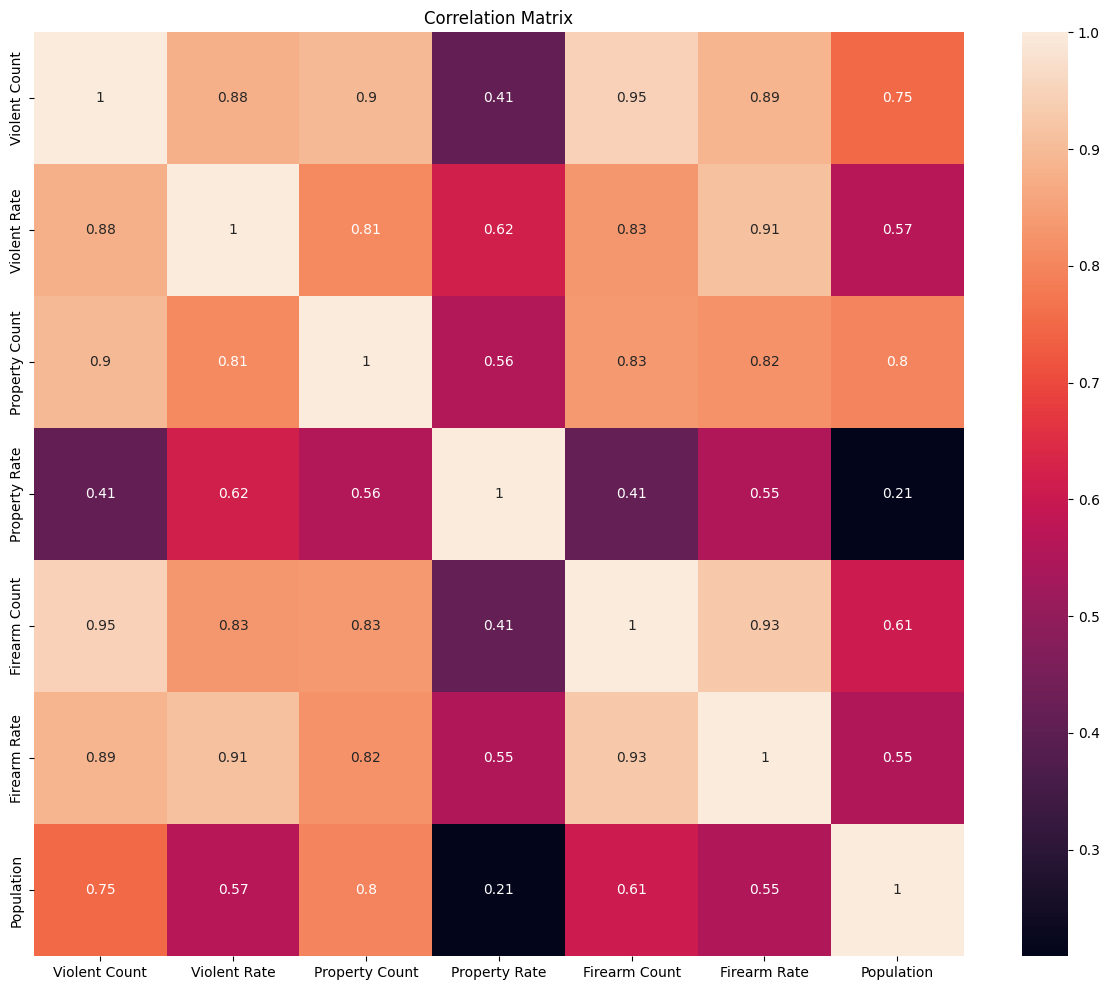

In [18]:
z = ['Violent Count', 'Violent Rate', 'Property Count', 'Property Rate', 'Firearm Count', 'Firearm Rate', 'Population']
plt.figure(figsize=(15,12))
sns.heatmap(df[z].corr(), fmt='.2g', annot=True)
plt.title('Correlation Matrix')

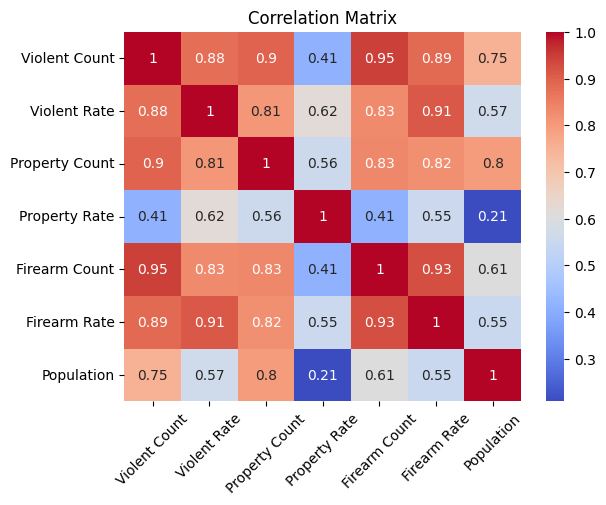

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = df[z].corr()

# Generate a heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Customize the plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

As observed from the correlation matrix, the targer variable **Violent Count** is highly correlated to **Population, Firearm Count and Property Count** <br>
let's now check the statistical significance of the these correlations by calculating the p-value

### Violent Count Vs Population

In [20]:
pearson_coef, p_value = stats.pearsonr(df['Population'], df['Violent Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7509967753196902  with a P-value of P = 0.0


Conclusion:

Since the p-value is < 0.001, the correlation between Population and Violent Count is statistically significant

<Axes: xlabel='Population', ylabel='Violent Count'>

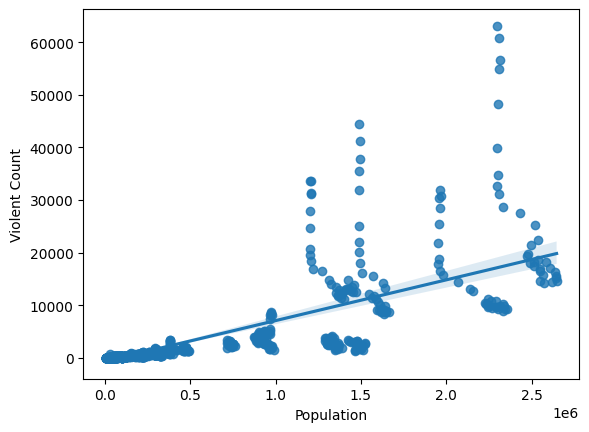

In [21]:
# display the relatioship between Violent crime and Population

sns.regplot(x='Population', y='Violent Count', data=df)

Population does not seem to be a good predictor. On top of that, the regression line does not capture quite well the data points that are scattered sometimes for away from it!

### Violent Count Vs Firearm Count

In [22]:
pearson_coef, p_value = stats.pearsonr(df['Firearm Count'], df['Violent Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.9474326138267682  with a P-value of P =  0.0


<Axes: xlabel='Firearm Count', ylabel='Violent Count'>

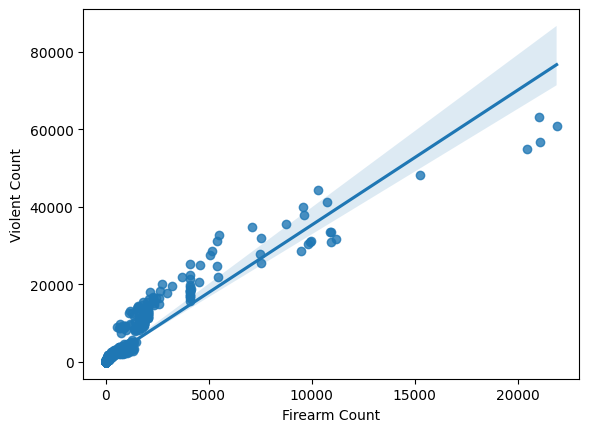

In [23]:
sns.regplot(x='Firearm Count', y='Violent Count', data=df)

the Firearm Count looks promising as a good predictor.

### Violent Count Vs Property Count

In [24]:
pearson_coef, p_value = stats.pearsonr(df['Property Count'], df['Violent Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8977722029425198  with a P-value of P =  0.0


<Axes: xlabel='Property Count', ylabel='Violent Count'>

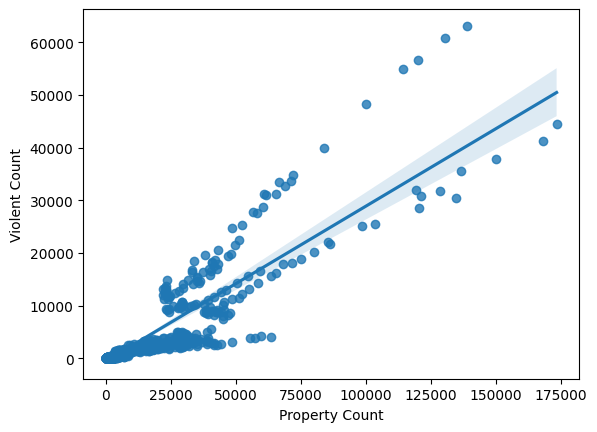

In [25]:
sns.regplot(x='Property Count', y='Violent Count', data=df)

the regression line captures the trend but still many data points are far away from it.
So, in a nutshell, let's consider Firearm Count and Property Count as perdictors for our future model

## <span style="color:brown">Model Development & Evaluation</span>

we are going to fit 3 models including SLR, MLR and a polynomial Regression of order 2 and evuale the most effective one for the prediction

In [26]:
# let's divide the dataset intro training and testing samples
from sklearn.model_selection import train_test_split

y_data = df['Violent Count']

x_data = df.drop('Violent Count', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

print('number of test sample is:', x_test.shape[0])

print('number of training sample is:', x_train.shape[0])

number of test sample is: 596
number of training sample is: 1388


### Simple Linear Regression

In [27]:
# let's create a linear regression object
lm = LinearRegression()

#let's fit with both the predictor (Firearm Count) and the target variable
lm.fit(x_train[['Firearm Count']], y_train)

#let's get the metrics for the Measures the out-of sample evaluation

print('The R-squared value on the test sample is:', lm.score(x_test[['Firearm Count']], y_test))
print('------------------------')
print('------------------------')   

# let's predict the test sample using the predcit function
from sklearn.metrics import mean_squared_error
yhat = lm.predict(x_test[['Firearm Count']])
print('the Mean Squared error on test sample is:', mean_squared_error(y_test, yhat))

The R-squared value on the test sample is: 0.8907630170916483
------------------------
------------------------
the Mean Squared error on test sample is: 2398960.9437158876


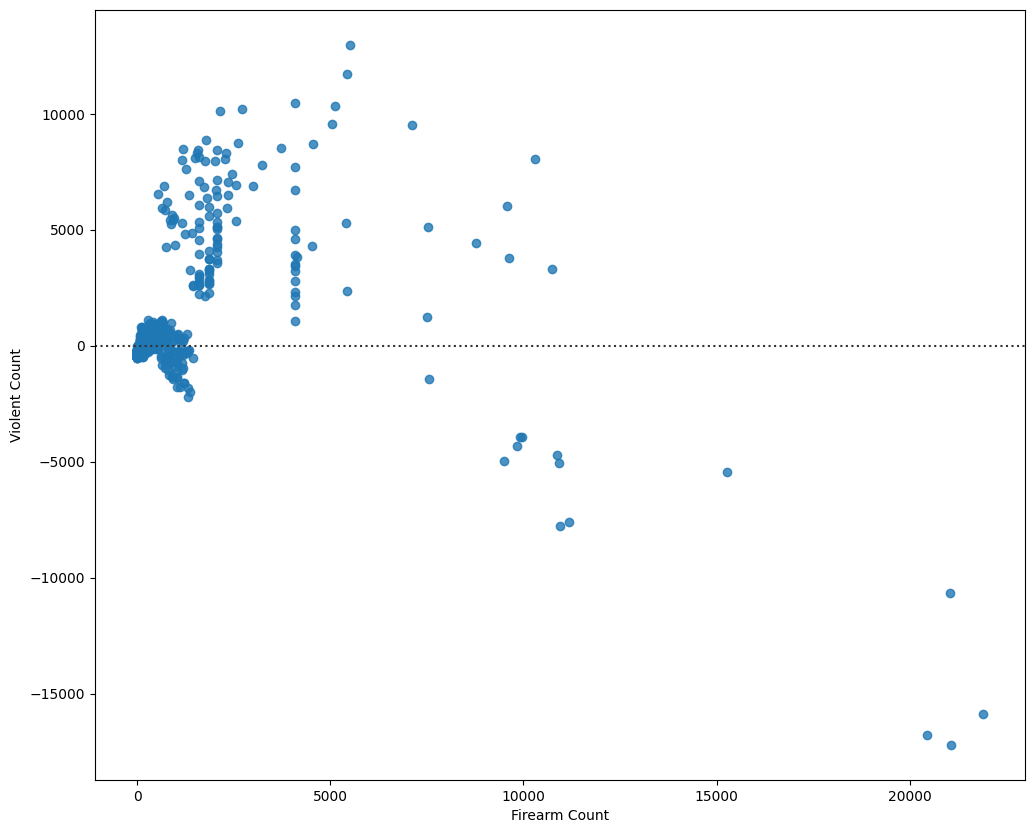

In [28]:
# let's check the residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['Firearm Count'], y=df['Violent Count'])
plt.show()

we observe that the residuals are not randomly spread around the x-axis. Thus, a non-linear relationship may better explain this dataset

### Multiple Linear Regression

In [29]:
# let's fit a MLR with the independent variables 'Firearm Count' & 'Property Count'

LM=LinearRegression()

LM.fit(df[['Firearm Count', 'Property Count']], df['Violent Count'])

#let's get the metrics for the Measures the out-of sample evaluation

print('The R-squared value on the test sample is:', LM.score(x_test[['Firearm Count', 'Property Count']], y_test))
print('------------------------')
print('------------------------')   

# let's predict the test sample using the predcit function
from sklearn.metrics import mean_squared_error
Yhat = LM.predict(x_test[['Firearm Count', 'Property Count']])
print('the Mean Squared error on test sample is:', mean_squared_error(y_test, Yhat))

The R-squared value on the test sample is: 0.9278164427586545
------------------------
------------------------
the Mean Squared error on test sample is: 1585228.0975734321


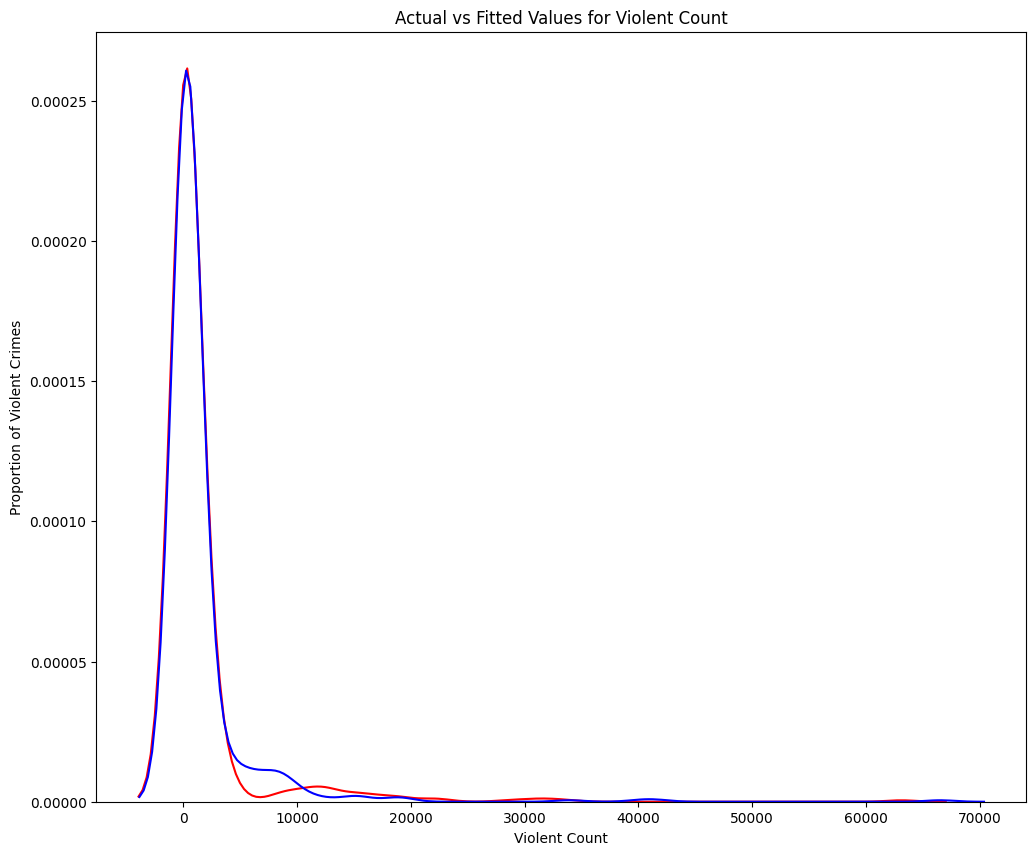

In [30]:
# let's observe the distribution plot of the actual and fitted values of the testing data
width = 12
length = 10
plt.figure(figsize=(width, length))

ax1 = sns.kdeplot(y_test,  color="r", label="Actual Value")
sns.kdeplot(Yhat, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Violent Count')
plt.xlabel('Violent Count')
plt.ylabel('Proportion of Violent Crimes')

plt.show()
plt.close()

we can see that the model caputures extremely well the data. The fitted values are almost confused to the actual values 

### Polynomial Regression

In [31]:
# let's perform a degree 2 polynomial transformation on the training data

Pr = PolynomialFeatures(degree=2)
x_train_pr = Pr.fit_transform(x_train[['Firearm Count', 'Property Count']])
x_test_pr = Pr.fit_transform(x_test[['Firearm Count', 'Property Count']])
Pr

PolynomialFeatures()

In [32]:
# let's create another Regression object that is going to be called Poly

Poly = LinearRegression()
Poly.fit(x_train_pr, y_train)

#let's get the metrics for the Measures the out-of sample evaluation

print('The R-squared value on the test sample is:', Poly.score(x_test_pr, y_test))
print('------------------------')
print('------------------------')   

# let's predict the test sample using the predcit function
from sklearn.metrics import mean_squared_error
Yhat = Poly.predict(x_test_pr)
print('the Mean Squared error on test sample is:', mean_squared_error(y_test, Yhat))

The R-squared value on the test sample is: 0.9471227779353385
------------------------
------------------------
the Mean Squared error on test sample is: 1161240.3342532853


### Polynomial Regression with Pipeline

In [33]:
#let's create the pipeline features
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# let's create a pipeline object
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
# let's fit a pipeline model
pipe.fit(x_train[['Firearm Count', 'Property Count']], y_train)

#let's get the metrics for the Measures the out-of sample evaluation

print('The R-squared value on the test sample is:', pipe.score(x_test[['Firearm Count', 'Property Count']], y_test))
print('------------------------')
print('------------------------')   

# let's predict the test sample using the predcit function
from sklearn.metrics import mean_squared_error
Yhat_pipe = pipe.predict(x_test[['Firearm Count', 'Property Count']])
print('the Mean Squared error on test sample is:', mean_squared_error(y_test, Yhat_pipe))

The R-squared value on the test sample is: 0.9471227779494742
------------------------
------------------------
the Mean Squared error on test sample is: 1161240.333942851


since the 2 independent variables: Firearm Count and Property Count are correlated, let's examine a ridge regression

### Ridge Regression

let's create a Ridge regression object and set the regulation parameter alpha to 0.1

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [36]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [37]:
RR=Ridge()
RR

Ridge()

In [38]:
Grid1 = GridSearchCV(RR, parameters1)

In [39]:
Grid1.fit(x_train[['Firearm Count', 'Property Count']], y_train)

GridSearchCV(estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [40]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100000)

In [44]:
print( 'The R-squared value on the test sample is:', BestRR.score(x_test[['Firearm Count', 'Property Count']], y_test))

from sklearn.metrics import mean_squared_error
Yhat_RR = Grid1.predict(x_test[['Firearm Count', 'Property Count']])
print('the Mean Squared error on test sample is:', mean_squared_error(y_test, Yhat_RR))

The R-squared value on the test sample is: 0.9275447982866819
the Mean Squared error on test sample is: 1591193.700627347


### Model selection & Prediction

let's summarize the evaluation metrics of each models.
<p>SLR: Simple Linear Regression</p>
<p>Multiple Linear Regression</p>
<p>Polynomial Regression</p>
<p>Ridge Regression</p>

|Model|R-squared|MSE|
|-----|---------|---|
|SLR|0.89|2398960|
|MLR|0.93|1585228|
|PR|0.95|1161240|
|RR|0.92|1591194|

In [ ]:
the polynomial regression has the highest R-squared value and the lowest Mean Squared error value, so it is the most appropriate for the data